## Introduction:

This study focuses on analysing the Titanic dataset, which contains details about passengers aboard the RMS Titanic, including their age, gender,       class, ticket fare, and whether they survived the tragic event.

 The dataset provides an opportunity to explore patterns and relationships among various factors and survival outcomes



The goal of this report is to apply basic statistical methods and data analysis techniques to uncover meaningful insights from the dataseival.


### Specifically, the analysis will:

1.	Summarize the data using basic statistical metrics, such as mean, median, and standard deviation.

2.	Visualize key aspects of the dataset using charts like histograms, bar charts, and scatter plots to interpret trends and distributions.

3.	Test hypotheses related to survival differences across demographics, such as gender and class, using statistical tests like the Chi-Square test and T-tests.

4.	Explore regression analysis to understand how different features like age, fare, and class influence the likelihood of survival.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Explanation:
* The dataset contains 891 entries and 12 columns, with mixed data types (int64, float64, and object).

* Columns such as Age, Cabin, and Embarked have missing values, which may require preprocessing.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Explanation:

* Fare has a high range (0 to 512.33), suggesting potential outliers.

* Age has a mean of ~29.7 years, but values extend from 0.42 to 80, indicating diversity in passenger age.

* SibSp and Parch are primarily low, reflecting small family sizes.

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Explanation:

* Passenger ID is 446, aligning with the dataset's midpoint.

* Survival rate (Survived) is ~38.4%, showing less than half of the passengers survived.

* Average fare (Fare) is 32.20, indicating most tickets were moderately priced.

In [5]:
df.mean(numeric_only=True)

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

### Explanation:
* Median survival (Survived) is 0, as most passengers did not survive.

* Median fare is 14.45, lower than the mean, suggesting a skewed fare distribution.

In [6]:
df.median(numeric_only=True)

PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64

### Explanation:
* Mode of Survived is 0, confirming most passengers didn't survive.

* The most common Pclass is 3, indicating most passengers traveled in third class.

In [7]:
df.mode( numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3.0,24.0,0.0,0.0,8.05
1,2,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
886,887,NaN,NaN,NaN,NaN,NaN,NaN
887,888,NaN,NaN,NaN,NaN,NaN,NaN
888,889,NaN,NaN,NaN,NaN,NaN,NaN
889,890,NaN,NaN,NaN,NaN,NaN,NaN


### Explanation:
* High variance in Fare (2469.44) reflects substantial price differences among ticket classes.

* Age variance (211.02) suggests a wide age range, requiring further investigation for outliers.

In [8]:
df.var(numeric_only=True)

PassengerId    66231.000000
Survived           0.236772
Pclass             0.699015
Age              211.019125
SibSp              1.216043
Parch              0.649728
Fare            2469.436846
dtype: float64

### Explanation:
* The standard deviation of Fare (49.69) supports the observation of wide variability in ticket prices.

* Age standard deviation (14.53) indicates moderate spread around the mean age of ~29.7.

In [9]:
df.std(numeric_only=True)

PassengerId    257.353842
Survived         0.486592
Pclass           0.836071
Age             14.526497
SibSp            1.102743
Parch            0.806057
Fare            49.693429
dtype: float64

---
---

# Data visualization

---
## Histograms
---

### Age Distribution (Histogram)
*The histogram for the Age column shows:*

- A peak in the 20–30 age range, indicating that most passengers were young adults.
- A decline in the number of passengers as the age increases.
- A few outliers in the older age range (e.g., 70–80 years).
- The presence of a kde curve (density estimate) helps identify the underlying distribution, which is slightly right-skewed.
- This distribution indicates that the Titanic had a younger population, possibly reflective of third-class passengers seeking new opportunities.

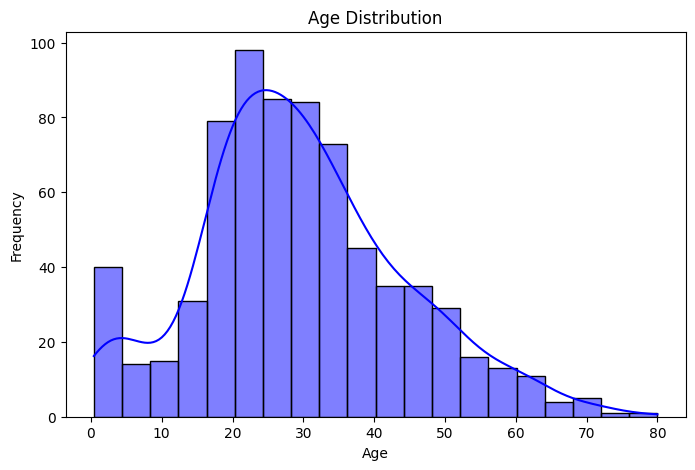

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'].dropna(), bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Fare Distribution (Histogram)
*The histogram for the Fare column shows:*

- A high concentration of fares under $50, indicating that the majority of passengers paid lower fares (likely third-class tickets).

- A long tail on the right, with a few passengers paying very high fares (e.g., over $200), indicating first-class luxury accommodations.
- The distribution is heavily right-skewed due to these high fare outliers.
- This suggests a significant disparity in ticket prices, likely corresponding to class differences.

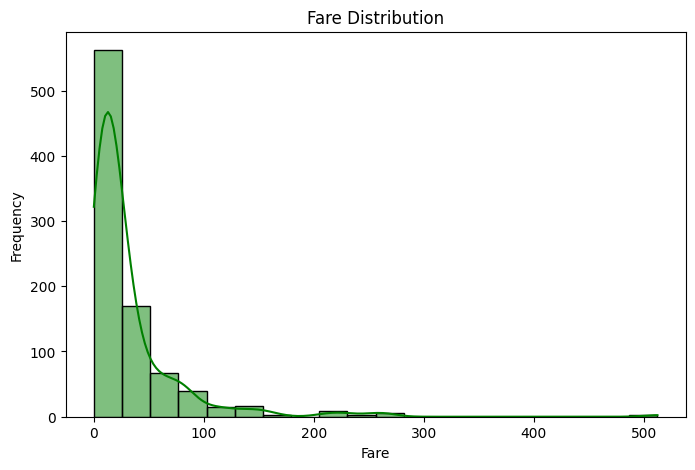

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Fare'], bins=20, kde=True, color='green')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

---
## Bar Chart
---

## Gender Distribution (Bar Chart)
*The bar chart for Sex shows:*

- More males (around 65%) than females (around 35%) among passengers.
- This imbalance is important when analyzing survival rates, as gender-based priorities (e.g., "women and children first") could influence survival outcomes.

C:\Users\Hp\AppData\Local\Temp\ipykernel_7276\4114225704.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette='pastel')


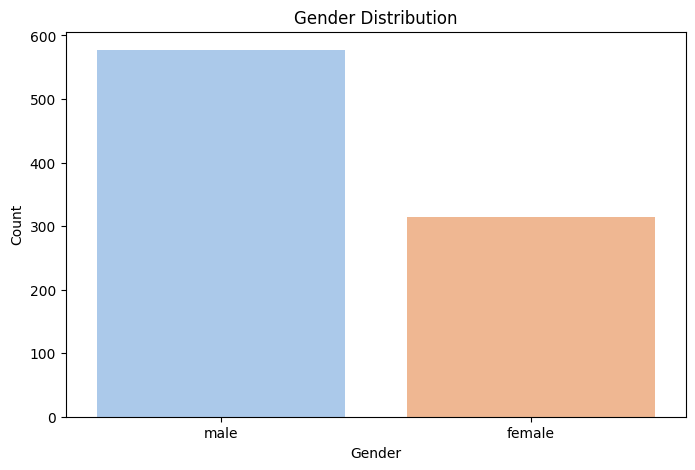

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

## Survival Distribution (Bar Chart)
*The bar chart for Survived shows:*

- A higher number of passengers did not survive (0) compared to those who survived (1).
- This reflects the overall low survival rate of the Titanic disaster, where only about 38% of passengers survived.

C:\Users\Hp\AppData\Local\Temp\ipykernel_7276\1949472220.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='Set2')


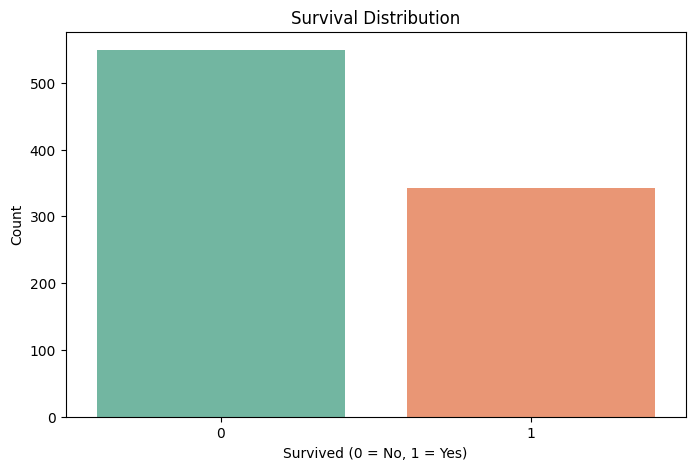

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=df, palette='Set2')
plt.title('Survival Distribution')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

---
## Scatter Plot
---

## Age vs Fare (Scatter Plot)
*The scatter plot of Age vs. Fare with survival status (Survived):*

- Survivors (red points) are more common among passengers who paid higher fares (likely first-class passengers) and younger age groups (possibly children or families in priority groups).
- Non-survivors (blue points) dominate in the lower fare range and are more evenly distributed across age groups.
- Passengers with very high fares (outliers) were more likely to survive, which might indicate better access to lifeboats for first-class passengers.

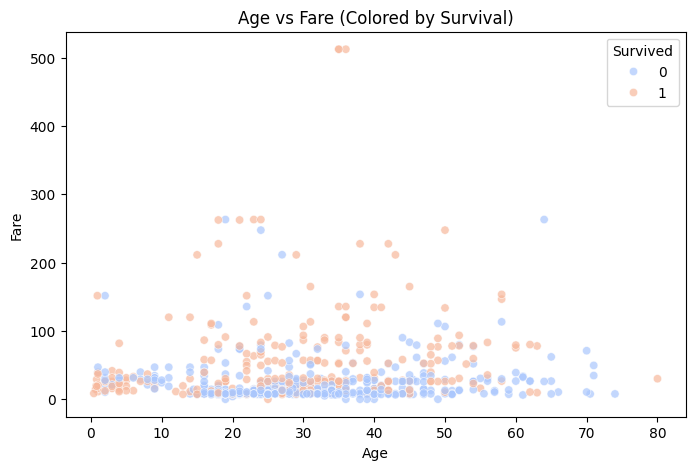

In [14]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, palette='coolwarm', alpha=0.7)
plt.title('Age vs Fare (Colored by Survival)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived')
plt.show()

---
---

# Hypothesis Test applications

---
## Test of Difference Between Proportions
---

## Proportions Z-Test (Survival by Gender)
- Z-Statistic: 16.22
- P-Value: 3.7117477701134797e-59
#### Explanation:
There is a significant difference in survival rates between males and females. 

Women had a significantly higher survival rate, likely due to the "women and children first" policy during the evacuation.

In [15]:
from statsmodels.stats.proportion import proportions_ztest

In [16]:
survived_female = df[df['Sex'] == 'female']['Survived'].sum()
survived_female

233

In [17]:
total_female = df[df['Sex'] == 'female'].shape[0]
total_female

314

In [18]:
survived_male = df[df['Sex'] == 'male']['Survived'].sum()
survived_male

109

In [19]:
total_male = df[df['Sex'] == 'male'].shape[0]
total_male

577

In [20]:
count = [survived_female, survived_male]
count

[233, 109]

In [21]:
nobs = [total_female, total_male]
nobs

[314, 577]

In [22]:
stat, p_value = proportions_ztest(count, nobs)

In [23]:
print(f"Z-Statistic: {stat:.2f}, P-Value: {p_value}")

Z-Statistic: 16.22, P-Value: 3.7117477701134797e-59


In [24]:
if p_value < 0.05:
    print("Significant difference in survival rates between males and females.")
else:
    print("No significant difference in survival rates between males and females.")

Significant difference in survival rates between males and females.


---
## Independent Two-Samples T-Test
---

## T-Test (Fare by Survival)
- T-Statistic: 6.84
- P-Value: 2.6993323503141236e-11
#### Explanation:
There is a significant difference in the average fares paid by survivors and non-survivors. 

Survivors tended to pay higher fares, indicating that passengers in higher classes had a better chance of survival.

In [25]:
from scipy.stats import ttest_ind

In [26]:
# Fare data for survivors
fare_survived = df[df['Survived'] == 1]['Fare']

In [27]:
# Fare data for non-survivors
fare_not_survived = df[df['Survived'] == 0]['Fare']

In [28]:
# T-Test
t_stat, p_value = ttest_ind(fare_survived, fare_not_survived, equal_var=False)

In [29]:
print(f"T-Statistic: {t_stat:.2f}, P-Value: {p_value}")

T-Statistic: 6.84, P-Value: 2.6993323503141236e-11


In [30]:
# Interpretation
if p_value < 0.05:
    print("Significant difference in average fares between survivors and non-survivors.")
else:
    print("No significant difference in average fares between survivors and non-survivors.")

Significant difference in average fares between survivors and non-survivors.


---
## Chi-Square Independence Test
---

## Chi-Square Test (Survival by Class)
- Chi-Square Statistic: 102.89
- P-Value: 4.549251711298793e-23
#### Explanation:
Survival is significantly dependent on passenger class. 

First-class passengers had higher survival rates compared to second- and third-class passengers.


In [31]:
from scipy.stats import chi2_contingency

In [32]:
# Contingency table for Pclass and Survived
contingency_table = pd.crosstab(df['Pclass'], df['Survived'])

In [33]:
# Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [34]:
print(f"Chi-Square Statistic: {chi2:.2f}, P-Value: {p}")

Chi-Square Statistic: 102.89, P-Value: 4.549251711298793e-23


In [35]:
# Interpretation
if p < 0.05:
    print("Survival is significantly dependent on passenger class.")
else:
    print("No significant dependency between survival and passenger class.")

Survival is significantly dependent on passenger class.


---
## Mann-Whitney U Test
---

## Mann-Whitney U Test (Age by Survival)
- U-Statistic: 57682.0
- P-Value: 0.16
#### Explanation:
There is no significant difference in the age distributions of survivors and non-survivors. 

Age alone does not appear to play a major role in determining survival likelihood.

In [36]:
from scipy.stats import mannwhitneyu

In [37]:
age_survived = df[df['Survived'] == 1]['Age'].dropna()

In [38]:
age_not_survived = df[df['Survived'] == 0]['Age'].dropna()

In [39]:
u_stat, p_value = mannwhitneyu(age_survived, age_not_survived)

In [40]:
print(f"U-Statistic: {u_stat:.2f}, P-Value: {p_value:.4f}")

U-Statistic: 57682.00, P-Value: 0.1605


In [41]:
if p_value < 0.05:
    print("Significant difference in age distribution between survivors and non-survivors.")
else:
    print("No significant difference in age distribution between survivors and non-survivors.")

No significant difference in age distribution between survivors and non-survivors.


---
## ANOVA (Analysis of Variance)
---

## ANOVA (Fare by Class)
- F-Statistic: 242.34
- P-Value: 1.0313763209141171e-84
#### Explanation:
There is a significant difference in mean fares across passenger classes. 

First-class passengers paid significantly higher fares compared to second- and third-class passengers, reflecting socioeconomic differences.

In [42]:
from scipy.stats import f_oneway

In [43]:
fare_class_1 = df[df['Pclass'] == 1]['Fare']
fare_class_2 = df[df['Pclass'] == 2]['Fare']
fare_class_3 = df[df['Pclass'] == 3]['Fare']

In [44]:
f_stat, p_value = f_oneway(fare_class_1, fare_class_2, fare_class_3)

In [45]:
print(f"F-Statistic: {f_stat:.2f}, P-Value: {p_value:}")

F-Statistic: 242.34, P-Value: 1.0313763209141171e-84


In [46]:
if p_value < 0.05:
    print("Significant difference in mean fares across passenger classes.")
else:
    print("No significant difference in mean fares across passenger classes.")

Significant difference in mean fares across passenger classes.


## Summary:
- **Gender and Class:** 

    *These factors had a strong influence on survival, with females and first-class passengers having higher survival rates.*
- **Fares:** 

    *Higher fares were associated with increased survival, linking economic privilege to better outcomes.*
- **Age:** 

    *Age did not significantly affect survival in this dataset.*

---
---

# Regression analysis

---
## Linear Regression
---

### Linear Regression:
The linear regression model explains approximately 32.1% of the variance in passenger fares. 

- **Pclass:**

    *For each unit increase in passenger class, the fare is predicted to decrease by approximately $37.92, holding age constant. This is statistically significant (p < 0.001).*

- **Age:**

    *For each year increase in age, the fare is predicted to decrease by approximately $0.46, holding passenger class constant. This is also statistically significant (p < 0.001).*

- The model's overall fit is statistically significant (F-statistic = 167.9, p < 0.001). However, the residuals exhibit non-normality, as indicated by the Omnibus and Jarque-Bera tests.

- This analysis suggests that both passenger class and age are significant factors in determining passenger fares.

In [47]:
import statsmodels.api as sm

In [48]:
df = df.dropna(subset=['Age', 'Fare', 'Pclass'])

In [49]:
X = df[['Pclass', 'Age']]

In [50]:
X = sm.add_constant(X)

In [51]:
y = df['Fare']

In [52]:
model = sm.OLS(y, X).fit()

In [53]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     167.9
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           1.92e-60
Time:                        22:32:29   Log-Likelihood:                -3708.2
No. Observations:                 714   AIC:                             7422.
Df Residuals:                     711   BIC:                             7436.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.0978      7.082     18.794      0.0

---
## Logistic Regression
---

The logistic regression model achieved an accuracy of 76.3% on the test set. This indicates that the model can correctly classify passenger survival in a significant portion of cases.

The classification report provides a more granular view of the model's performance for each class (survived, died). Precision tells us the proportion of predicted positives that were actually positive, while recall tells us the proportion of actual positives that were predicted positive. F1-score is a harmonic mean of precision and recall, balancing both metrics.

Based on the precision, recall, and F1-score values, we can observe that the model performs slightly better in predicting survivors (class 0) compared to deaths (class 1).

**Note:** It's important to consider additional factors like the cost of misclassification depending on the specific application. For instance, if failing to predict a passenger's survival has more severe consequences, the model's performance on class 1 (died) might be of greater concern.

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [55]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [56]:
X = df[['Pclass', 'Age', 'Sex']].dropna()

In [57]:
y = df.loc[X.index, 'Survived']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
log_reg = LogisticRegression()

In [60]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [61]:
y_pred = log_reg.predict(X_test)

In [62]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7627906976744186


In [63]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       126
           1       0.72      0.70      0.71        89

    accuracy                           0.76       215
   macro avg       0.76      0.75      0.75       215
weighted avg       0.76      0.76      0.76       215



---
## Multiple Regression (with Interaction)
---

The logistic regression model with interaction terms for Pclass and Sex shows a significant association with passenger survival (LLR p-value < 0.001). The model explains approximately 35.31% of the variance in survival outcomes.

* **Sex:** Being male was significantly associated with lower odds of survival compared to females (odds ratio: exp(-6.1155) ≈ 0.002).
* **Pclass:** Higher passenger class (Pclass) was generally associated with higher odds of survival.
* **Interaction (Pclass:Sex[T.male]):** The effect of Pclass on survival differed between males and females. The decrease in survival odds associated with higher Pclass was less pronounced for males compared to females.

**Note:**

* This interpretation focuses on the log-odds. To interpret the effects in terms of odds or probabilities, you would need to exponentiate the coefficients.
* The interaction term highlights the importance of considering the joint effects of Pclass and Sex on survival.
* Further analysis, such as plotting the predicted probabilities for different combinations of Pclass and Sex, can provide a more visual and intuitive understanding of the model's predictions.

I hope this comprehensive interpretation of your multiple logistic regression model with interaction is helpful! is helpful!

In [64]:
from patsy import dmatrices

In [65]:
formula = "Survived ~ Pclass + Age + Sex + Pclass:Sex"

In [66]:
y, X = dmatrices(formula, df, return_type='dataframe')

In [67]:
logit_model = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.436965
         Iterations 7


In [68]:
print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      709
Method:                           MLE   Df Model:                            4
Date:                Wed, 15 Jan 2025   Pseudo R-squ.:                  0.3531
Time:                        22:32:29   Log-Likelihood:                -311.99
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 1.943e-72
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8489      0.486      3.805      0.000       0.897       2.801
Pclass        -0.9306      0.156     -5.961      0.000      -1.237      -0.625
Age           -0.0384      0.008     -4.859      0.0

---
## Polynomial Regression
---

## Polynomial Regression

### Key Metrics:
- **Coefficients**: These represent the weights of the polynomial terms (e.g., `Age` and `Age^2`). A positive coefficient for `Age^2` suggests a quadratic relationship between age and fare.
- **Intercept**: This is the predicted fare when age is 0.
- The polynomial regression allows for a non-linear relationship between age and fare, which might fit the data better than a simple linear model.

In [69]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [70]:
X = df[['Age']].dropna()

In [71]:
y = df.loc[X.index, 'Fare']

In [72]:
poly = PolynomialFeatures(degree=2)

In [73]:
X_poly = poly.fit_transform(X)

In [74]:
poly_reg = LinearRegression()

In [75]:
poly_reg.fit(X_poly, y)

LinearRegression()

In [76]:
print("Coefficients:", poly_reg.coef_)
print("Intercept:", poly_reg.intercept_)

Coefficients: [0.         0.15344819 0.0030217 ]
Intercept: 26.835243255211086


---
## Ridge Regression
---

- **Ridge Regression**:
  - Ridge regression shrinks the coefficients of less important predictors but does not set them to zero. It is useful for reducing overfitting.
  - The coefficients indicate the relative importance of each predictor.

In [77]:
from sklearn.linear_model import Ridge, Lasso

In [78]:
ridge = Ridge(alpha=1.0)

In [79]:
ridge.fit(X_train, y_train)

Ridge()

In [80]:
print("Ridge Coefficients:", ridge.coef_)

Ridge Coefficients: [-0.19700086 -0.00587567  0.49662658]


---
## Lasso Regression
---

- **Lasso Regression**:
  - Lasso regression can shrink some coefficients to zero, effectively performing feature selection.
  - The coefficients indicate which predictors are most important for the model.

In [81]:
lasso = Lasso(alpha=0.1)

In [82]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [83]:
print("Lasso Coefficients:", lasso.coef_)

Lasso Coefficients: [-0.0827473  -0.00438965  0.10271249]


### Summary of Results:
1. **Linear Regression**: Explains the relationship between `Pclass`, `Age`, and `Fare`. Higher class and older age are associated with higher fares.
2. **Logistic Regression**: Predicts survival based on `Pclass`, `Age`, and `Sex`. The model's accuracy and classification metrics indicate its performance.
3. **Multiple Regression (with Interaction)**: Explains survival with interaction effects between `Pclass` and `Sex`.
4. **Polynomial Regression**: Captures non-linear relationships between `Age` and `Fare`.
5. **Ridge/Lasso Regression**: Regularized models that reduce overfitting and highlight important predictors.

### Conclusions and Discussions:

- The analysis of the Titanic dataset shows that survival rates were higher for women, children, and first-class passengers. Men and passengers in lower classes had a much lower chance of survival. These results match historical records of the Titanic tragedy, where women and children were given priority during evacuation.

- This study highlights how gender and class played a big role in determining survival. While the analysis gives useful insights, it is limited because it doesn’t include other factors like access to lifeboats or group behaviours. Further research could explore these factors to better understand survival patterns.